### Validation Curves


In [49]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))

In [50]:
import numpy as np

# helpful function to populate a dataset
def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

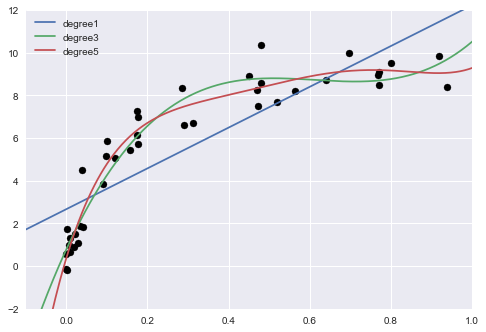

In [51]:
# now visualise the data
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # plot formatting

X_test = np.linspace(-0.1, 1.2, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree{0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best')
plt.show()

# this all looks great - but I don't understand too much of it!

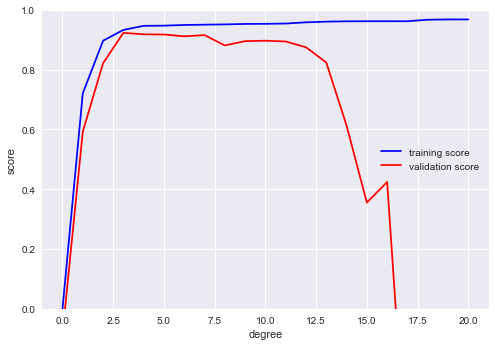

In [56]:
# let's implement a validation_curve 
# Given model, data, parameter name, and a range, we should
# get the training score and validation score across the range
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                         'polynomialfeatures__degree',
                                         degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')

plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')
plt.show()

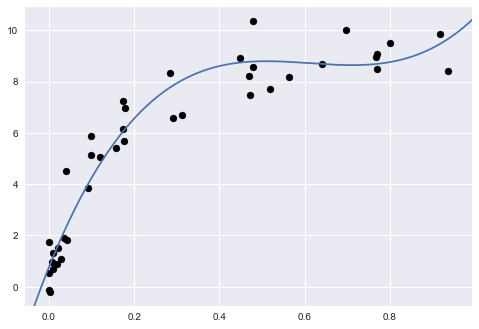

In [72]:
# overlay the validation curve for a degree-3 polynomial onto the original data
plt.scatter(X.ravel(), y, color='black')
lim = plt.axis()

# note that we can chain these methods
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)

plt.plot(X_test.ravel(), y_test)
plt.axis(lim)
plt.show() 

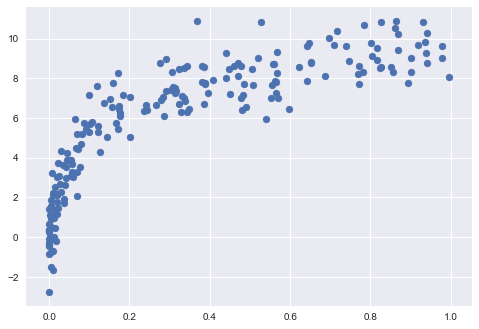

In [85]:
# generate some new data with 5x the number of points
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2)
plt.show()

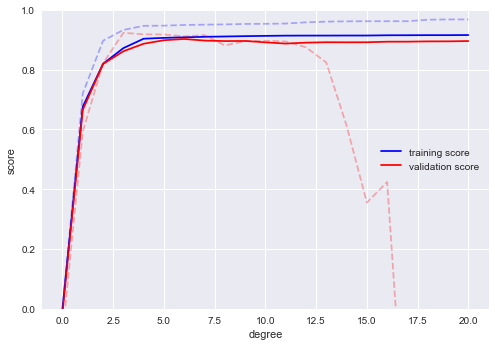

In [86]:
# duplicate the code used earlier to over-plot the results
degree = np.arange(0, 21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                         'polynomialfeatures__degree',
                                         degree, cv=7)

plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')

# also over-plot the data used earlier
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')

plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')
plt.show()

# solid lines show the results with a larger dataset
# with the 200x dataset the validation score tells 
# us that the model is a good fit

### Learning Curves

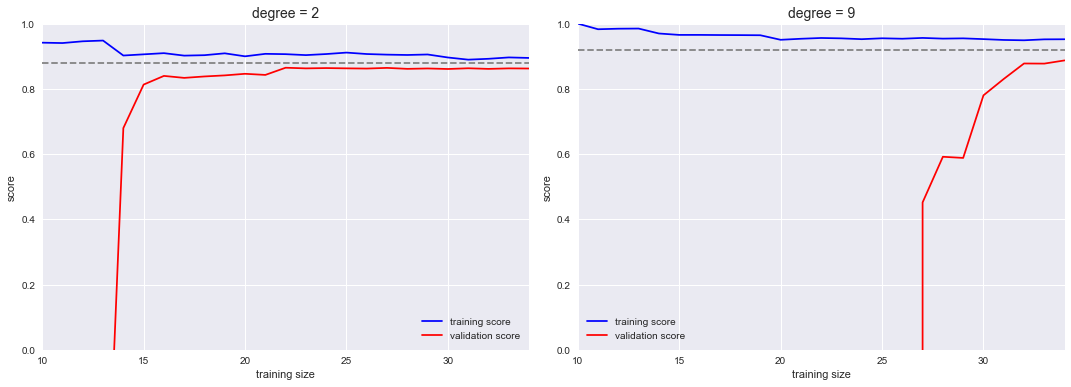

In [130]:
from sklearn.learning_curve import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                     X, y, cv=7,
                                     train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')    
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray', linestyle='dashed')
  
    ax[i].set_ylim(0,1)
    ax[i].set_xlim([N[0], N[-1]])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')
    
# left: low-complexity model training curve (degree-2)
# right: high-complexity model training curve (degree-9)

# note how the optimum training size on RHS is approx 32
# but for LHS it is approx 22, and adding more training
# data won't make any improvements


### Validation in practice: Grid Search


In [138]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
             'linearregression__fit_intercept': [True, False],
             'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

# fit the model to the data
grid.fit(X, y)

# GridSearchCV tells us the best parameters to use - nice!
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

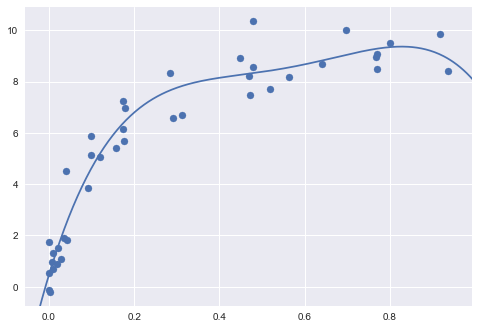

In [143]:
# using the best model, 
model = grid.best_estimator_

# show the fit to our data
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)
plt.show()

